# Kaggle Titanic
## Logistic Regression with Python
This is my first attempt to apply ML techniques to find insights and answer questions that are hiden in the data. I do this on a famous beginner data set called [Titanic](https://www.kaggle.com/c/titanic). I have divided the process into seven steps to make it more manageable.  

# Step 1: Frame the problem


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

**Note**: The above text is taken from the problem introduction given at [Kaggle](https://www.kaggle.com/c/titanic). 

# Step 2: Obtain the data

In [18]:
#Install a package that will allow us to vidualize the missing data values
!pip install -q missingno
# Import neccessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as ms
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#import dataset
Filepath = "C:/Users/18326/desktop/MachineLearning/Projects/titanic.csv"
data = pd.read_csv(Filepath)

# Step 3: Analyse the data

In [10]:
# Understanding the data

data.shape

(891, 12)

In [63]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Note1: Some insights about the data
1. 50% of the passengers are of age below or above ~29 years.
2. 50% of the passengers are between age 20 and 38 since 25 percentile is 20.125 and 75 percentile is 38.
3. The oldest pasenger on the boat is 80 years old.
4. The youngest passenger is less than a year - babies were on the boat as well who might have been given preference to take the safeboat. 
5. Fare seems to have a high standard deviation which indicates high variation in the prices that passenger paid for the tickets. THe value of 75% indicates that 75% of the passenger paid less than 31 dollar whereas the max value indicates that there were passengers who paid close to 500 bucks as well. 


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
#counts the total number of NaN values in each coloumn
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

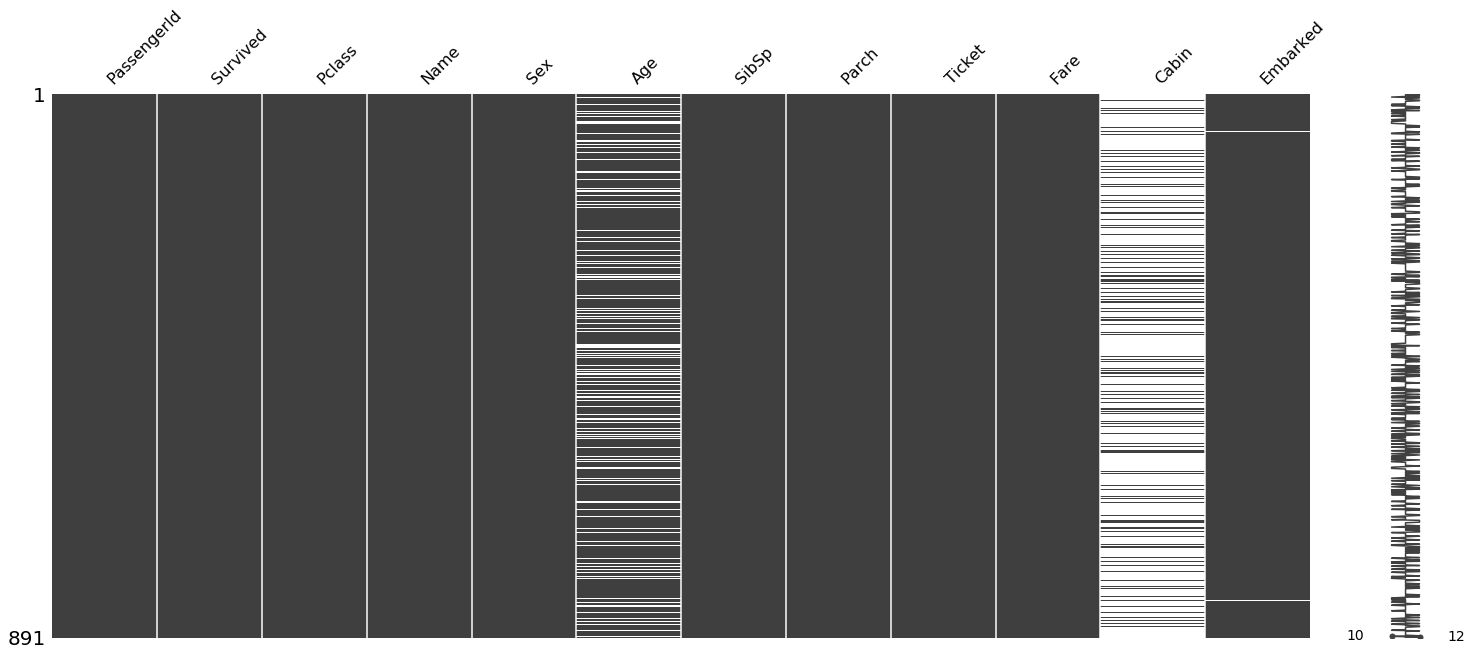

In [19]:
#Use missingno package to visualize missing data values
ms.matrix(data)

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Note 2: Some insight about the missing data
 We notice that there are 177, 687, and 2 missing values in "Age" , "Cabin", "Embarked" respectively. We might need to either drop or fill values in these three columns. Let's investigate further before making a call here. 

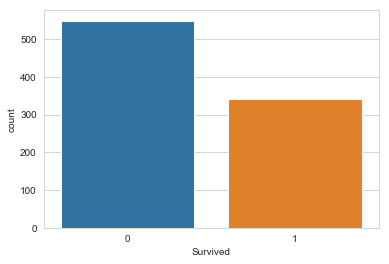

In [25]:
#Visualize data with seaborn
sns.countplot(x = "Survived", data = data)

### Note 3: Some insight about the data by plotting certain columns
1. In total, only about 40% of people survived.
2. The number of suvivers is only 60% of non-survivers.


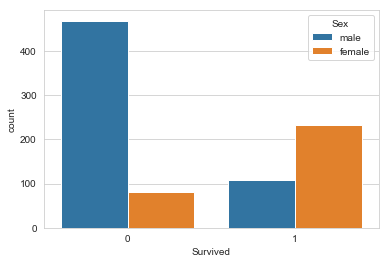

In [26]:
sns.countplot(x = "Survived", hue = "Sex", data = data)

### Note 4: Some insight about the data by plotting certain columns
1. There are about 50% more female survivers than males. 
2. The number of males who survived were less than 1/4th of the total number of males who did not survive. 
3. The number of females who survived were more than the double of the total number of females who did not survive. 
4. About 80% of men and only 33% of women died.


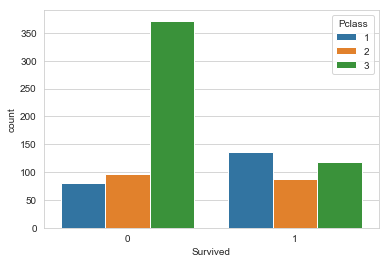

In [27]:
sns.countplot(x = "Survived", hue = "Pclass", data= data)

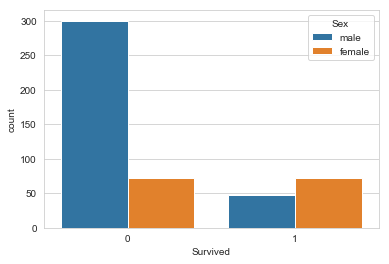

In [69]:

#data("Survived_ThirdClass") =  data("Survived" and "Pclass" = 3)
sns.countplot(x = "Survived", hue = "Sex", data = data.loc[data['Pclass'] == 3])

### Note 5: Some more insight about the data by plotting few other columns
1. Most of the people who died were of class 3. No surprise!
2. As expected, the likelihood of men surviving in third class was quite low - ~14% where as the women in third class had a 50% chance of surviving.

C:\Users\18326\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


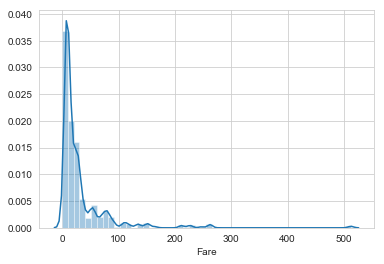

In [38]:
sns.distplot(data["Fare"])

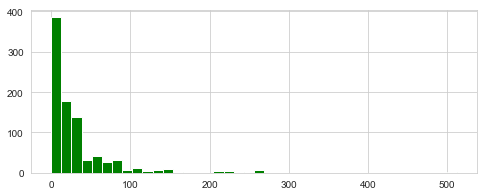

In [45]:
data["Fare"].hist(color = "green", bins = 40, figsize = (8, 3))

In [46]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'data.corr')

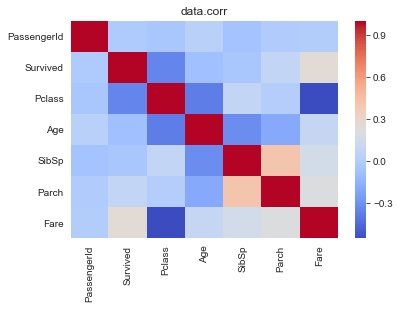

In [50]:
sns.heatmap(data.corr(), cmap = "coolwarm")
plt.title("data.corr")

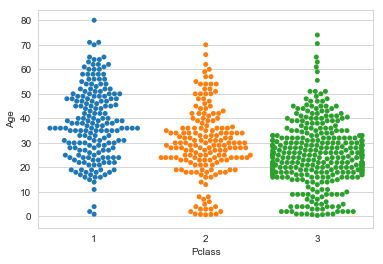

In [51]:
sns.swarmplot
sns.swarmplot(x = "Pclass", y = "Age", data = data)

### Note 6: Further information about the data.
1. The above graph shows the distribution of the people within certain age group that were in each class. 
2. Clearly there were more people in class 3 with most of them clustered around the age group 15-35. 

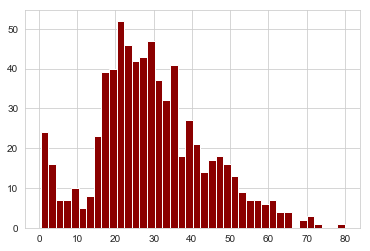

In [62]:
data["Age"].hist(bins = 40, color = "darkred")

### Note 7: Further information about the data.
The above graph shows the distribution of the people within certain age group that were in each class. 
Clearly there were more people in class 3 with most of them clustered around the age group 15-35. 

# Step 4: Feature Engineering
In this step, we want to take care of the missing data values and turn the data type into numerical type. 

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


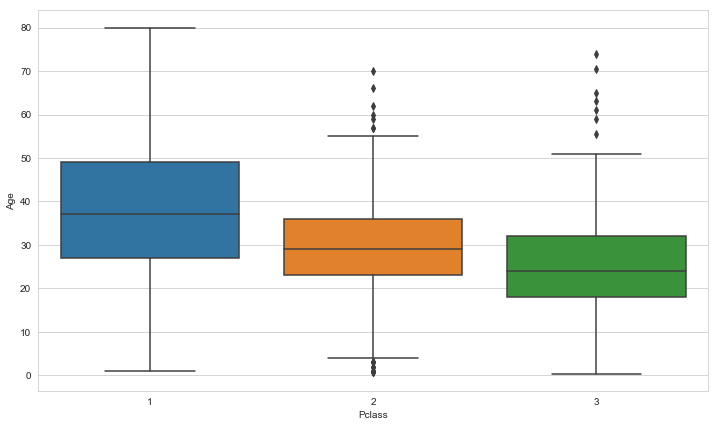

In [79]:
plt.figure(figsize = (12, 7))
sns.boxplot(x="Pclass", y = "Age", data = data)

### Note 8: Information about age
1. The above graph shows that 50% of the class 1 passenger have age less than 38. It is close to 29 to class 2 and 25 for class 3. 
2. The middle 50% of the class 1 passenger is between 27 to 49.
3. The middle 50% of the class 2 passenger is between 23 to 38.
4. The middle 50% of the class 3 passenger is between 19 to 31.

In [83]:
# To take care of the missing Age values, we will be replacing NaN values by mean age value.
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
# Mean age = 29
data["Age"].fillna(29, inplace=True)

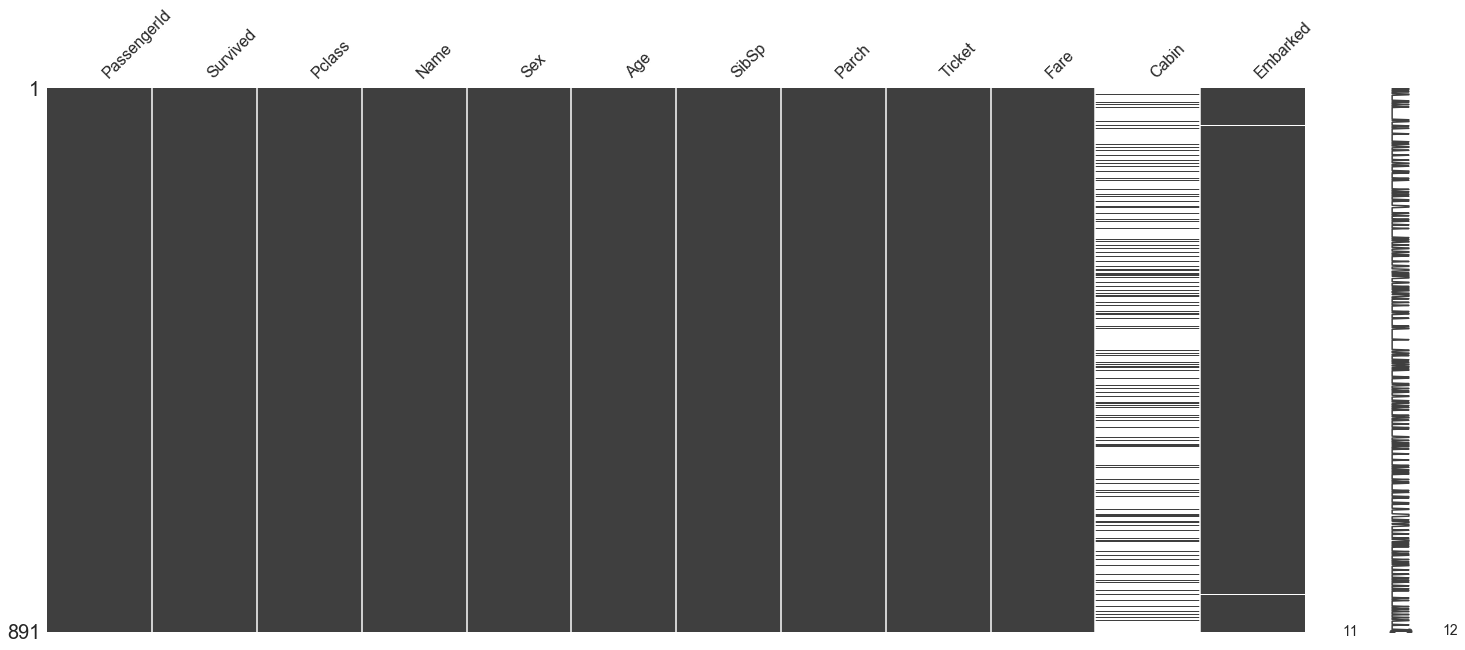

In [85]:
ms.matrix(data)

In [88]:
data["Cabin"].value_counts

<bound method IndexOpsMixin.value_counts of 0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880   

### Note 9: The number of NaN values in Cabin column are quite large in number. 
It is not clear how cabin would have an impact on the model here. So, we decided to drop the column for simplicity of the model. 


In [94]:
data.drop("Cabin", axis = 1, inplace= True)

In [95]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [96]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Note 10: This note is about handling missing Embarked value
We will only drop the missing embarked rows to mkae up for the two missing values. 

In [98]:
data.dropna(inplace = True)

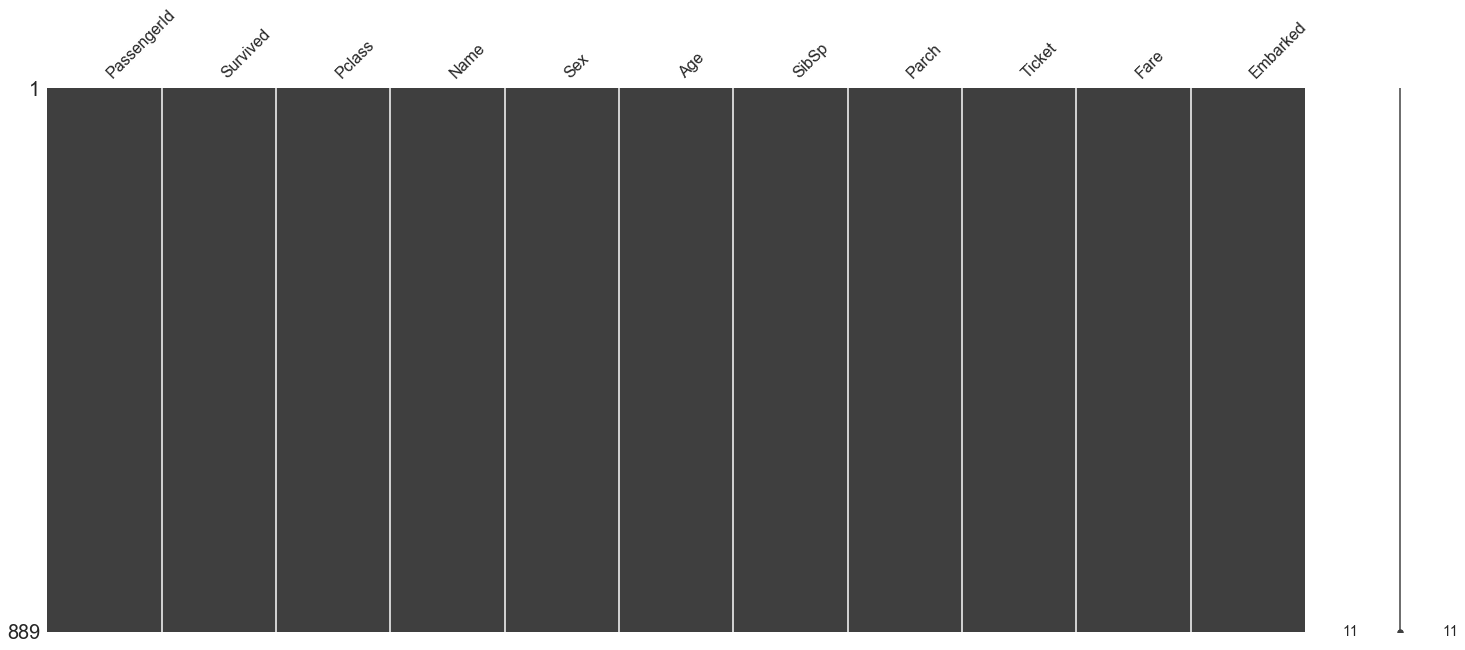

In [99]:
ms.matrix(data)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Note 11: There are 4 columns that contains non-numeric data. 
In this stage, we will consider dropping non-numeric data. We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [101]:
data["Sex"].value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object>

In [110]:
sex = pd.get_dummies(data["Sex"], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [103]:
data["Embarked"].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object>

In [108]:
embark = pd.get_dummies(data["Embarked"], drop_first = True)
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [111]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [113]:
#In this step, we can safely drop the 4 columns that have non-numeric values as we have already captured the neccessary information about relevant columns. 
old_data = data.copy()
data.drop(["Sex", "Embarked", "Name", "Ticket"], axis = 1, inplace = True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [114]:
data = pd.concat([data, sex, embark], axis = 1)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [117]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.514252,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,256.998173,0.486260,0.834700,12.970884,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


# Step 5: Model Selection

### Building a Logistic Regression model


In [120]:
X = data.drop("Survived", axis = 1) # Input is everything except survived
y = data["Survived"] # Output is survived

In [121]:
y.shape

(889,)

In [122]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.20, 
                                                    random_state=42)

In [126]:
X_test.shape

(178, 9)

In [127]:
len(y_test)

178

In [128]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,2.311586,29.514252,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,256.998173,0.834700,12.970884,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [130]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,446.922644,2.322082,29.718481,0.554149,0.382560,32.060354,0.663854,0.091421,0.722925
std,256.635124,0.835180,13.127103,1.168643,0.804865,49.195227,0.472722,0.288409,0.447869
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,225.500000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,451.000000,3.000000,29.000000,0.000000,0.000000,14.500000,1.000000,0.000000,1.000000
75%,672.500000,3.000000,36.000000,1.000000,0.000000,30.695800,1.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [131]:
y_train.describe()

count    711.000000
mean       0.381153
std        0.486012
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [132]:
from sklearn.linear_model import LogisticRegression

In [135]:
# Build the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train) # training time!

C:\Users\18326\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
logmodel.coef_, logmodel.intercept_

(array([[ 4.38832003e-04, -8.11312878e-01, -3.02860653e-02,
         -3.37576329e-01, -7.43127625e-02,  5.20483731e-03,
         -2.45530581e+00,  3.84251572e-02, -3.01348724e-01]]),
 array([3.82727989]))

In [144]:
predict = logmodel.predict(X_test)
predict[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [145]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

# Step 6: Evaluation
In this step, we will check precision, recall, f1-score using clasification report!

In [148]:
from sklearn.metrics import confusion_matrix, classification_report

In [149]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict))

0.8089887640449438


In [151]:
print(confusion_matrix(y_test, predict))

[[92 17]
 [17 52]]


### Precision score
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The best value is 1 and the worst value is 0.

In [152]:
from sklearn.metrics import precision_score

In [153]:
print(precision_score(y_test, predict))

0.7536231884057971


### Recall Score
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.The best value is 1 and the worst value is 0.

In [157]:
from sklearn.metrics import recall_score

In [158]:
print(recall_score(y_test, predict))

0.7536231884057971


### F1 score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)

In [159]:
from sklearn.metrics import f1_score

In [160]:
print(f1_score(y_test, predict))

0.7536231884057971


### Note 12: To get all of the metric in one go, use the following function. 
Classification_Report


In [162]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

   micro avg       0.81      0.81      0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# Step 7: Predict on New Cases

In [166]:
prod_data = pd.read_csv("C:/Users/18326/desktop/MachineLearning/Projects/Production.csv")

In [167]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


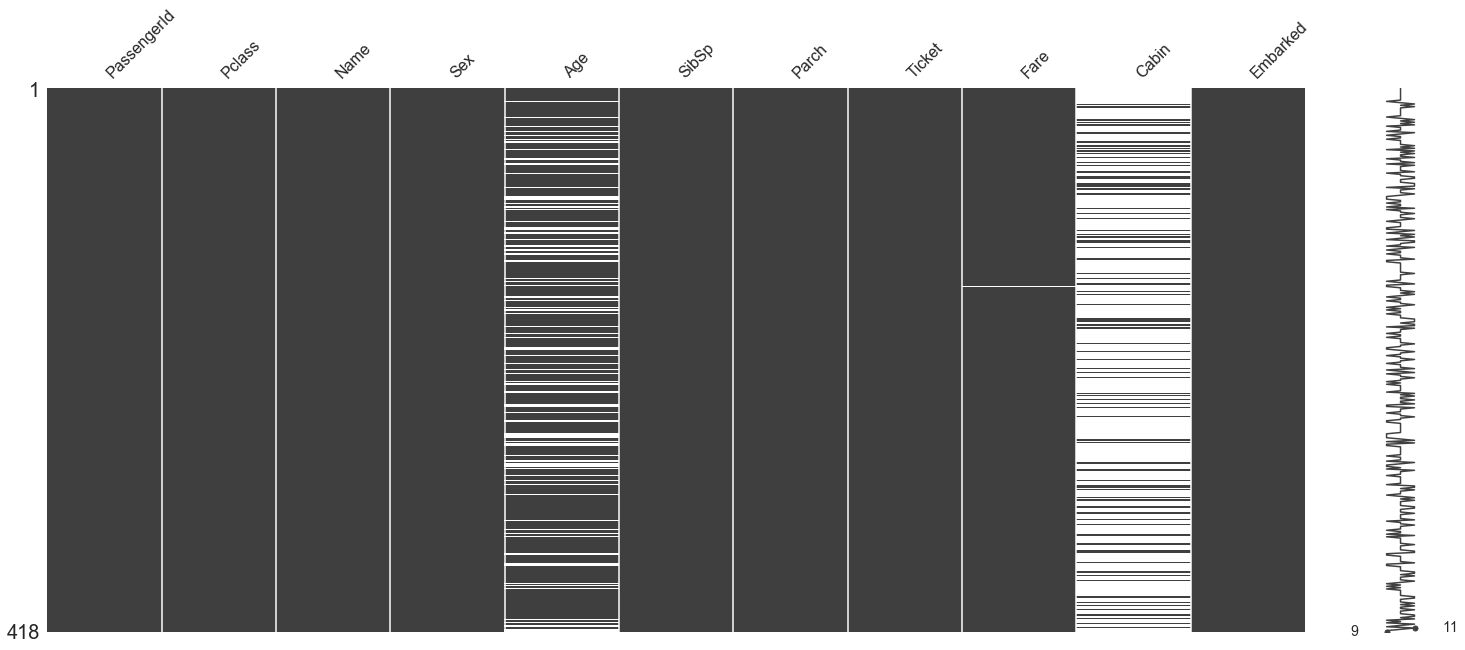

In [168]:
ms.matrix(prod_data)

### Note 13: Data Cleaning is needed to apply the model
Pay attention to age, Cabin, Fare, Name, Emabrked and Sex as all of this variables have similar iossues that we saw in our original data. 

There are inconsistencies in test data.We can use the same graph functions that are used to visualize the train data for test data as well.We use the same data cleaning techniques like removing the cabin column and applying impute_age function on age column on test data.
But we cannot remove any rows because kaggle wants same number of rows in submission csv also. So we fill the missing values in fare with mean.

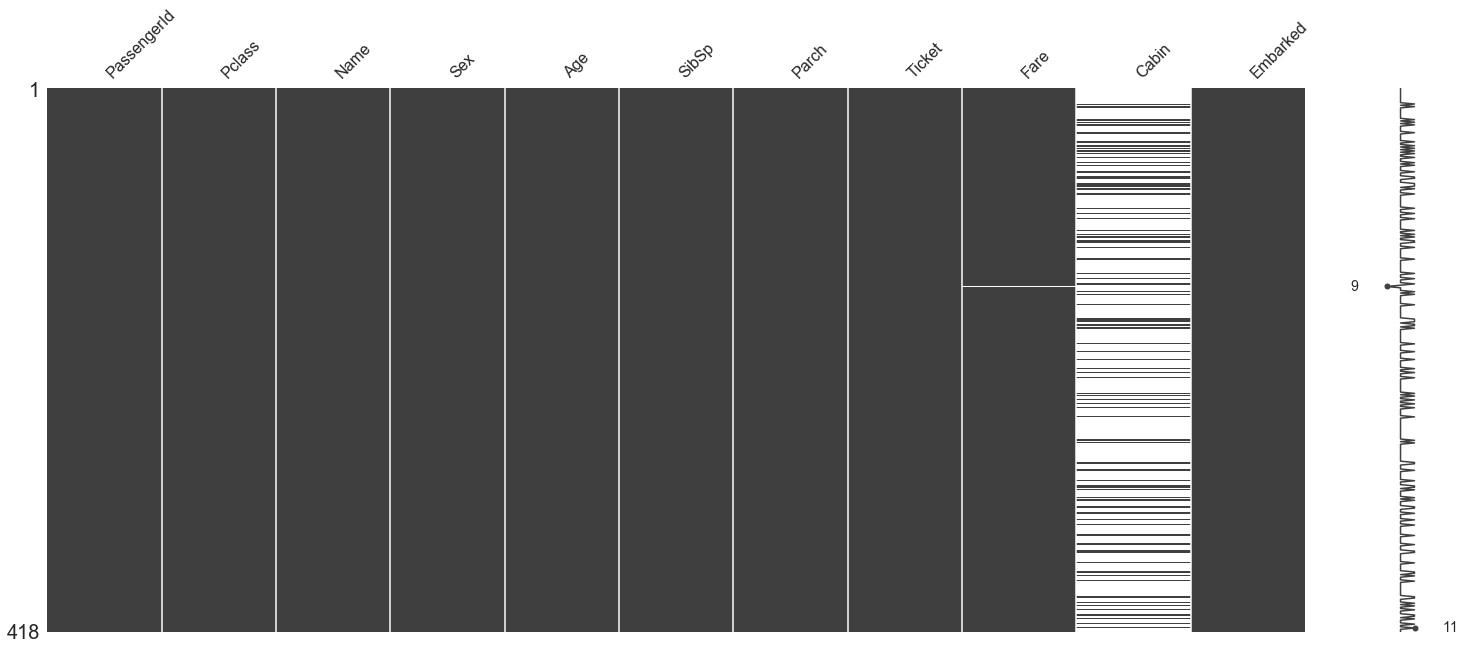

In [170]:
prod_data["Age"].fillna(29, inplace= True)
ms.matrix(prod_data)

In [171]:
prod_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.010766,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.645028,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


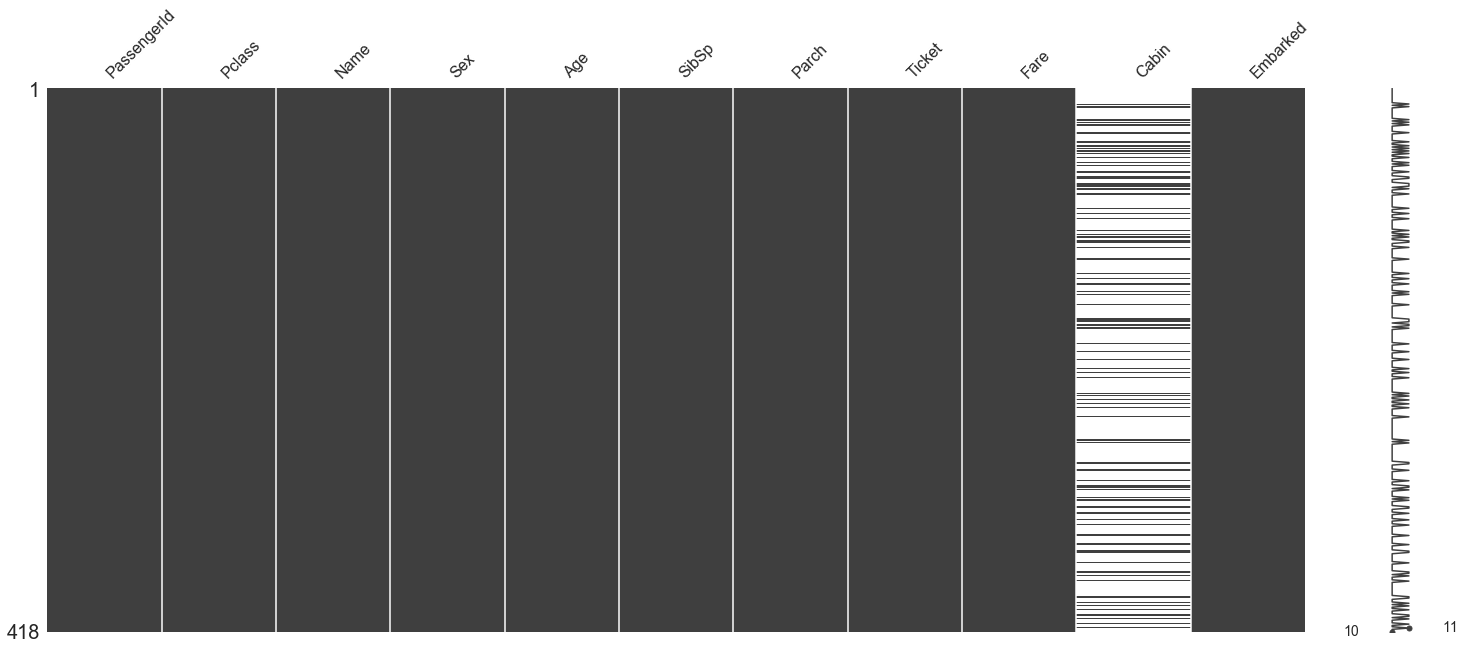

In [173]:
prod_data["Fare"].fillna(35, inplace= True)
ms.matrix(prod_data)

In [182]:
prod_data.drop('Cabin',  axis = 1, inplace= True)

KeyError: "['Cabin'] not found in axis"

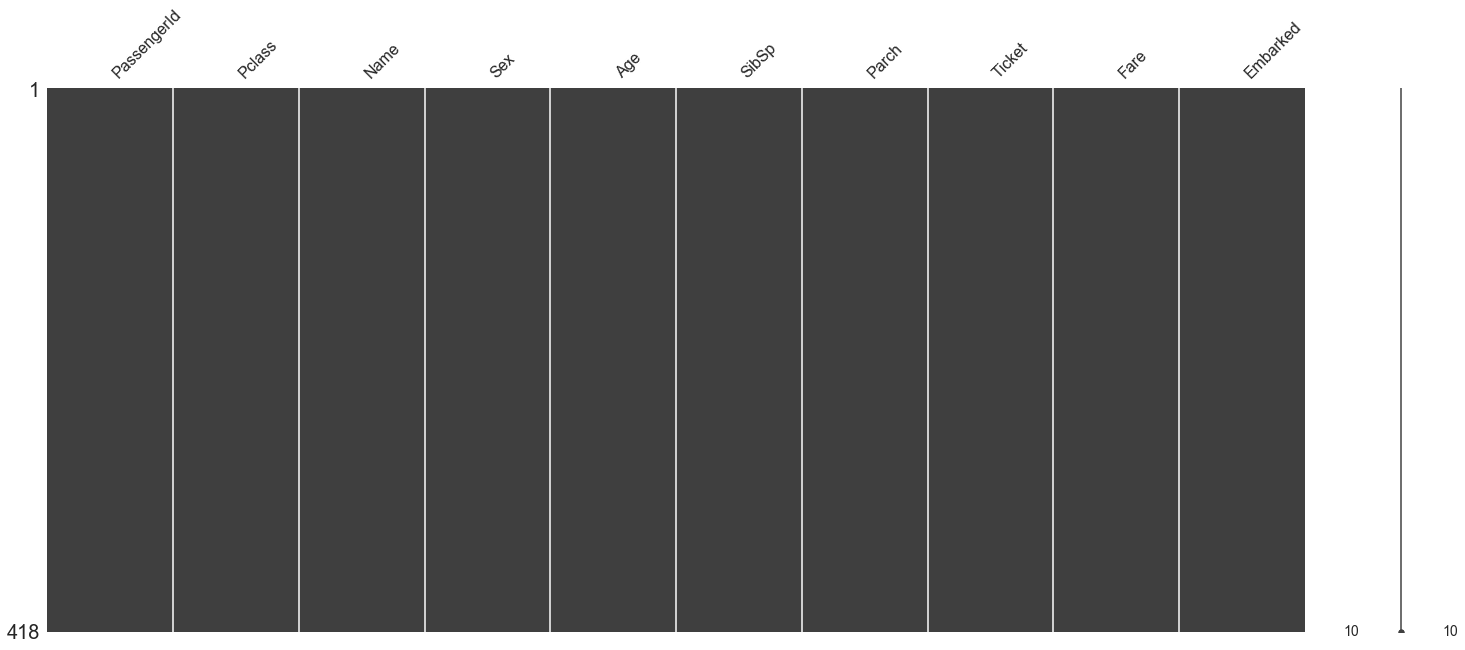

In [183]:
ms.matrix(prod_data)

In [188]:
sex = pd.get_dummies(prod_data["Sex"], drop_first = True)
embark = pd.get_dummies(prod_data["Embarked"], drop_first= True)
prod_data.drop(["Sex", "Embarked", "Name"], axis = 1, inplace= True)
prod_data = pd.concat([prod_data, sex, embark], axis = 1)

KeyError: 'Sex'

In [189]:
prod_data.drop(["Ticket"], axis = 1, inplace= True)

In [190]:
prod_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [191]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [193]:
predict1 = logmodel.predict(prod_data)
predict1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [202]:
data1 = pd.DataFrame(predict1, columns = ["Survived"])
data2 = pd.DataFrame(prod_data["PassengerId"], columns=["PassengerId"])
data2.head()
result = pd.concat([data2, data1], axis = 1)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [208]:
#from google.colab import files
from IPython.display import FileLink, FileLinks
result.to_csv("C:/Users/18326/desktop/MachineLearning/Projects/result.csv", index = False)
#FileLinks('C:/Users/18326/desktop/MachineLearning/Projects/result.csv')